
# Project: Investigate a Dataset (TMDb Movies Dataset)
#### By: Mohamed Wakiel
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### Overview
>
> To complete my Data Analysis project I will be using the TMDb movie dataset.
>
>This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue, cast, and genres etc.

 
>### Questions:
>1. Which movies have the most and least budgets?
>2. Which movies have the most and least earned revenue?
>3. Which movies have the most and least profit?
>4. Which movies have the longest and shortest runtime?
>5. Average runtime of the movies,
>6. In which year we had most no. of profitable movies (we'll decide which movie is profitable depending on it's profit)?
>7. In which month we get most no. of profitable movies?
>
>### Final Conclusion
>####    Properties of the movies with respect to the profitable movies:
>
>  -  Successful Genres.
>
>  -  Average Budget of the movies.
>
>  -  Average Revenue earned by the movies
>
>  -  Average duration of the movies
>
>  -  Most Frequent Actor  
>
>  -  Most Frequent Director  
>
>  -  Most Frequent Release Month 

In [1]:
#Importing pandas, numpy,seaborn, and matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Loading and printing data.

df = pd.read_csv('tmdb-movies.csv')

# Showing the first 5 rows 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#The dimensions of the dataset
df.shape

(10866, 21)

### Cleaning Check

In [4]:
# Getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check for duplicates in the data
sum(df.duplicated())

1

In [6]:
# Investigating types of certain columns 
type(df['budget'][0])


numpy.int64

In [7]:
type(df['release_date'][0])

str

In [8]:
type(df['revenue'][0])

numpy.int64

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Removing unused information from the dataset)

>1. Remove unnecessary columns such as 'id', 'imdb_id',  'popularity', 'homepage',  production_company, 'keywords',  'production_companies'.
>2. Changing release date column from string to date format.
>3. Removing the duplicated values.
>4. Replacing zero with NAN in runtime column.
>5. replacing all the values from '0' to NAN.

### 1. Removing unused columns
>Just to be clear, these columns I want to delete are just irrelevant to analysing this dataset.

In [10]:
#Deleting Columns 
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'keywords', 'vote_count', 'vote_average']
#deleting the columns from the database
df = df.drop(del_col, 1)

# Showing the first 5 rows 
df.head()

,budget,revenue,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


### 2. Changing the release date column into standard date format

In [11]:
#Changing the type of 'release_date' 
df.release_date = pd.to_datetime(df['release_date'])

In [12]:
# Checking 'release_date' data type
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
#Adding release month to know which month is the most frequent 
#df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df.insert(12, 'release_month', pd.DatetimeIndex(df['release_date']).month)
df.head()

,budget,revenue,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,release_month,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,5,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,12,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,4,2015


### 3. Removing the duplicated values

In [14]:
df= df.drop_duplicates()

In [15]:
df.shape


(10865, 14)

In [16]:
sum(df.duplicated())

0

>There are now 10865 total entries in our dataset after removing the duplicates.


###  4. Replacing zero with NAN in runtime column.


In [17]:
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_month              0
release_year               0
dtype: int64

In [18]:
df[df['runtime'] ==0].count()

budget                  31
revenue                 31
original_title          31
cast                    31
homepage                 6
director                29
tagline                  5
overview                29
runtime                 31
genres                  30
production_companies    13
release_date            31
release_month           31
release_year            31
dtype: int64

In [22]:
df['runtime'] = df['runtime'].replace(0, np.nan)

In [23]:
df[df['runtime'] ==0].count()

budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_month           0
release_year            0
dtype: int64

In [24]:
df[df['runtime'] ==0]

,budget,revenue,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,release_month,release_year


###  5.Removing Zero from budget and revenue columns

In [26]:
df[df['revenue'] ==0].count()

budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
overview                6012
runtime                 5985
genres                  5993
production_companies    5082
release_date            6016
release_month           6016
release_year            6016
dtype: int64

In [27]:
df= df[df['revenue'] != 0]
df.shape


(4849, 14)

In [28]:
df= df[df['budget'] != 0]
df.shape

(3854, 14)

In [29]:
df[df['revenue']==0].count()

budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_month           0
release_year            0
dtype: int64

In [30]:
df[df['budget']==0].count()

budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_month           0
release_year            0
dtype: int64

>Now we have only 3854 no.of movies.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : Movies which had most and least budgets

In [31]:
df[df.budget == df.budget.max()].loc[:, ['original_title', 'budget']]

,original_title,budget
2244,The Warrior's Way,425000000


In [32]:
df[df.budget == df.budget.min()].loc[:, ['original_title', 'budget']]

,original_title,budget
2618,Lost & Found,1
3581,"Love, Wedding, Marriage",1


> The entry with id no. 2244 shows the largest budget with total of 425000000 dollar.
>
> While the entries with id no. 2618 and 3581 have the lowest budget with total of 1 dollar. 

### Research Question 2 : Movies with most and least earned revenue

In [33]:
df[df.revenue == df.revenue.max()].loc[:, ['original_title', 'revenue']]

,original_title,revenue
1386,Avatar,2781505847


In [34]:
df[df.revenue == df.revenue.min()].loc[:, ['original_title', 'revenue']]

,original_title,revenue
5067,Shattered Glass,2
8142,Mallrats,2


>"Avatar" shows the largest revenue with total of 237000000 dollar.
>
>While Shattered "Glass" and "Mallrats" have the lowest revenue with total of 2 dollar. 

### Research Question 3 : Movies which had most and least profit
We don't have a column represents the total profit of each movie in our dataset, to find the most and least profit movies so I will answer this question in two steps:

#### A. Calculating the profit of each movie
Adding a new column to the dataset represents the total profit for each movie in our dataset by subtracting the revenue from the budget.

In [35]:
# inserting 'profit'
df.insert(2,'profit',df['revenue']-df['budget'])

df.head()

,budget,revenue,profit,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,release_month,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,5,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,3,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,12,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,4,2015


#### B. Movies with most and least profit

In [36]:
df[df.profit == df.profit.max()].loc[:, ['original_title', 'profit']]

,original_title,profit
1386,Avatar,2544505847


In [37]:
df[df.profit == df.profit.min()].loc[:, ['original_title', 'profit']]

,original_title,profit
2244,The Warrior's Way,-413912431


>Avatar shows the largest profit with total of 2544505847 dollar.
>
>While The Warrior's Way has the lowest profti with total of -413912431
 dollar. Meaning, The movie made them lose 413912431.


### Research Question 4 : Movies with longest and shortest runtime

In [38]:
df[df.runtime == df.runtime.max()].loc[:, ['original_title', 'runtime']]

,original_title,runtime
2107,Carlos,338.0


In [39]:
df[df.runtime == df.runtime.min()].loc[:, ['original_title', 'runtime']]

,original_title,runtime
5162,Kid's Story,15.0


> The movie with id no. 2107 titled "Carlos" shows the longest runtime or duration about 338 minutes.
>
> While the movie with id no. 5162 titled "Kid's Story" shows the shortest runtime about 15 minutes.

### Research Question 5 : Average runtime of the movies

In [40]:
df['runtime'].mean()

109.22029060716139

> The average runtime of all movies is 109 minutes. Now I'll analyse this value from a visual perspective.

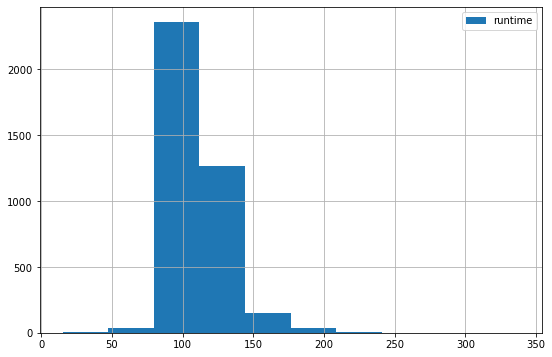

In [41]:
df['runtime'].hist(figsize=(9,6), legend='true');

> The above  graph shows that the average runtime is 109 minutes.

**Lets take another look at runtime of the movie using different kind of plots i.e Box Plot and Scatter Plot**

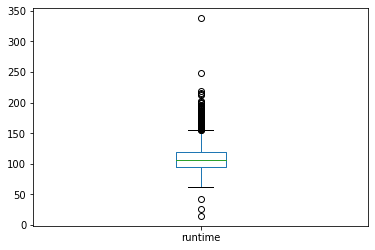

In [42]:

df['runtime'].plot(kind='box');

>"the box-plot" gives us an overall idea of how the runtime is distributed. It also shows the outliers here.

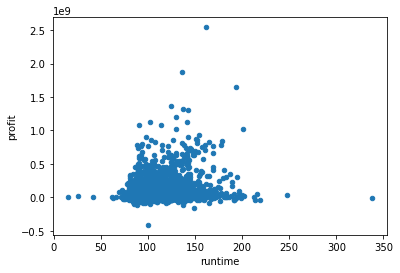

In [43]:
df.plot(x='runtime', y='profit',kind='scatter');

>"Scatter plot" Shows the the relation between runtime and profit, and we can clearly see that the density of profit increases around the runtime mean which is 109 minutes. 

### Research Question 6 : In which year we had most no. of profitable movies.

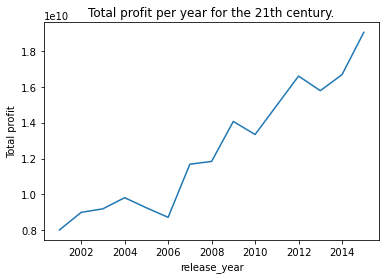

In [44]:
plt.ylabel('Total profit')
df[df['release_year']>2000].groupby('release_year')['profit'].sum().plot(kind='line', title='Total profit per year for the 21th century.');

In [45]:
df.groupby('release_year')['profit'].sum().idxmax()

2015

>We can say that 2015 was the year with most number of profitable movies.

### Research Question 7 : In which month we usually get most no. of profitable movies.

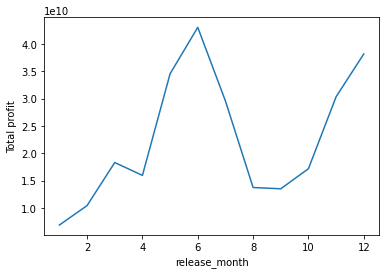

In [46]:
plt.ylabel('Total profit')
df.groupby('release_month')['profit'].sum().plot(kind='line');

In [47]:
df.groupby('release_month')['profit'].sum().idxmax()

6

>We can clearly see that June and December are the most frequent release months of profitable movies.

### Research Question 8 :With respect to the profitable movies
> We will now find characteristics of profitable movies, Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.
>
 **So lets fix this amount by selecting the movies having profit of $60M or more :**

In [48]:
profit_df = df[df['profit'] >= 60000000]

profit_df.head()


,budget,revenue,profit,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,release_month,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,5,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,3,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,12,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,4,2015


In [49]:
#profit_df.count().max()
profit_df.shape

(1197, 15)

> So our dataset is reduced to 1197.

> ### <font color=navy> A. Succesful Genres in profitable movies</font>

In [50]:
genres = (profit_df.genres.str.split('|', expand=True)
            .stack()
         
            .to_frame(name='genre'))
genres.index = genres.index.droplevel(1)


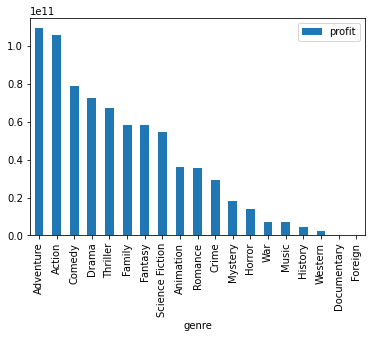

In [51]:
(genres.join(profit_df['profit'])
       .groupby('genre')
       .sum()
       ).sort_values(by='profit', ascending = False).plot(kind='bar');

The visualization above shows Frequent Used Genres in Profitable Movies from all movies.

> ### <font color=navy> B. Average Budget of profitable movies</font>

In [52]:
profit_df['budget'].mean()

63757867.39515455

> So the movies having profit of 60 million dollar or more have an average budget of 64 million dollar.

> ### <font color=navy> C. Average Revenue earned by profitable movies</font>

In [53]:
profit_df['revenue'].mean()

274739298.8086884

> So the movies having profit of 60 million dollar or more have an average revenue of 275 million dollar.



> ### <font color=navy> D. Average duration of profitable movies</font>

In [54]:
profit_df['runtime'].mean()

114.06850459482038

> So the movies having profit of 60 million dollar and more have an average duration of 114 minutes.



> ### <font color=navy> E. Most Frequent Cast in profitable movies</font>



In [55]:
cast = (profit_df.cast.str.split('|', expand=True)
            .stack()
         
            .to_frame(name='actor'))
cast.index = cast.index.droplevel(1)


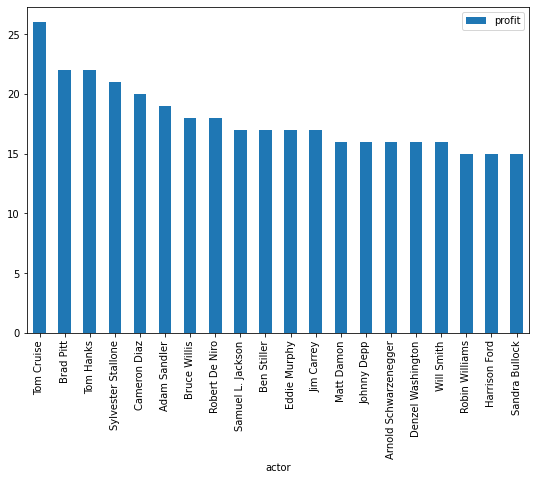

In [56]:
(cast.join(profit_df['profit'])
       .groupby('actor')
       .count()
       ).sort_values(by='profit', ascending = False).iloc[:20,:].plot(kind='bar',figsize=(9, 6));

In [57]:
(cast.join(profit_df['profit'])
       .groupby('actor')
       .count()
       ).sort_values(by='profit', ascending = False).head()

,profit
actor,
Tom Cruise,26
Brad Pitt,22
Tom Hanks,22
Sylvester Stallone,21
Cameron Diaz,20


>Tom Cruise is on the top for appearing the most in movies profiting more than $60M with total of 26, followed by Brad Pitt  and Tom Hanks with 22, followed by Sylvester Stallone with 21.

> ### <font color=navy> F. Most Frequent Director of profitable movies</font>



In [58]:
director = (profit_df.director
            .to_frame(name='name'))


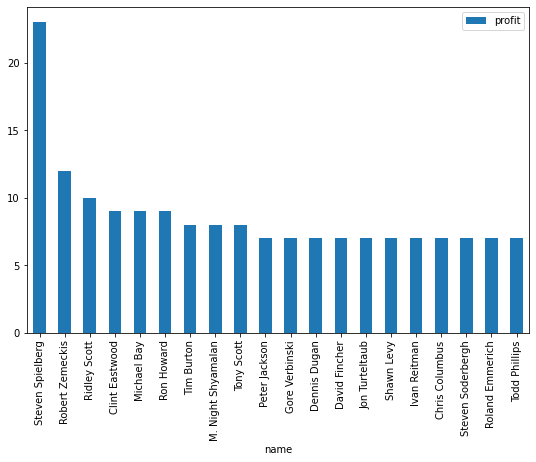

In [59]:
(director.join(profit_df['profit'])
       .groupby('name')
       .count()
       ).sort_values(by='profit', ascending = False).iloc[:20,:].plot(kind='bar' ,figsize=(9, 6));

In [60]:
(director.join(profit_df['profit'])
       .groupby('name')
       .count()
       ).sort_values(by='profit', ascending = False).head()

,profit
name,
Steven Spielberg,23
Robert Zemeckis,12
Ridley Scott,10
Clint Eastwood,9
Michael Bay,9


>Steven Spielberg is on the top director of the most in movies profiting more than $60M with total of 23 movies, followed by Robert Zemeckis with total of 12 movies, followed Ridley Scott with 10 movies.

> ### <font color=navy> G. Most Frequent Month of profitable movies</font>


In [61]:
month = (profit_df.release_month
            .to_frame(name='month_number'))


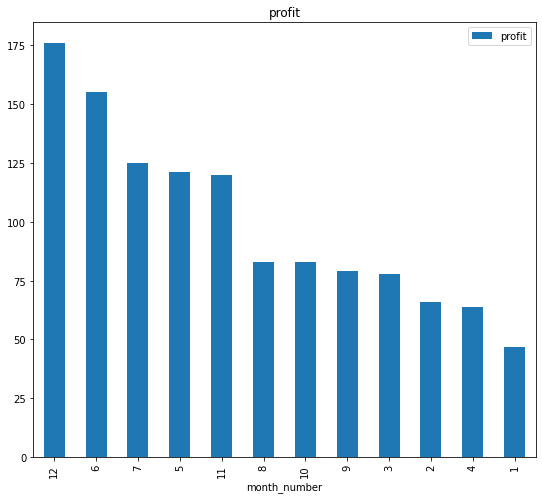

In [62]:
(month.join(profit_df['profit'])
       .groupby('month_number')
       .count()
       ).sort_values(by='profit', ascending = False).plot(kind='bar', subplots = 'true' ,figsize=(9, 8));

In [63]:
(month.join(profit_df['profit'])
       .groupby('month_number')
       .count()
       ).sort_values(by='profit', ascending = False).head(12)

,profit
month_number,
12,176
6,155
7,125
5,121
11,120
8,83
10,83
9,79
3,78


>We can clearly see that the best month to release a movie is December, followed by June. And this makes sense, since it's either summer or winter break.
>
>And the worst month to release a movie is January.

<a id='conclusions'></a>
## Conclusions

> After this interesting analysis for TMDb dataset and abstract conclusions after each analysis and visualtion, here are some final thoughts:
> 
>**For a Movie in order to be considered in a successful criteria**
>
>-  Average Budget must be around 64 millon dollar.
>-  Average duration of the movie must be 114 minutes.
>-  Any one of these actors should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz.
>-  Any one of these directors should direct the movie :Steven Spielberg, Robert Zemeckis, Ridley Scott, Clint Eastwood,	Or Michael Bay.
>-  Genre must be : Action, Adventure, Thriller, Comedy, Drama.
>-  The movie should be released in either December or June for best expected profit.
>
>  **By doing all this the movie might be one of the hits and hence can earn an average revenue of around 275 million dollar.**
>
>Final observation: This analysis was done considering the movies which had a significant amount of profit of around 60 million dollar. This might not be completely error free but by following these suggestions one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completely correct and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So an inconsistency appears here. Dropping the rows with missing values also affected the overall analysis.